In [1]:
# 1) 필수 라이브러리 import

In [32]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [33]:
import pandas as pd

# car.data 파일을 불러옵니다.
data = pd.read_csv(r'C:\Users\takea\Desktop\DL\datasets\week1\car+evaluation\car.data', header=None)

# car.names 파일에서 컬럼 이름을 가져옵니다.
column_names = [
    'buying',
    'maint',
    'doors',
    'persons',
    'lug_boot',
    'safety',
    'class']

# 데이터프레임에 컬럼 이름을 설정합니다.
data.columns = column_names

# 데이터셋 확인
print(data.head())
data

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [34]:
# 데이터프레임을 숫자로 변경
# 범주형 데이터(카테고리)를 숫자로 인코딩 하기 위해 사용함
from sklearn.preprocessing import OrdinalEncoder

encoder_buying = OrdinalEncoder(categories=[['vhigh', 'high', 'med', 'low']])
data['buying'] = encoder_buying.fit_transform(data[['buying']])

encoder_maint = OrdinalEncoder(categories=[['vhigh', 'high', 'med', 'low']])
data['maint'] = encoder_maint.fit_transform(data[['maint']])

# 'doors' 열에서 '5more' 값을 6으로 변경
data['doors'] = data['doors'].replace('5more', 6)

# 'persons' 열에서 'more' 값을 5로 변경
data['persons'] = data['persons'].replace('more', 5)

encoder_lug_boot = OrdinalEncoder(categories=[['small', 'med', 'big']])
data['lug_boot'] = encoder_lug_boot.fit_transform(data[['lug_boot']])

encoder_safety = OrdinalEncoder(categories=[['low', 'med', 'high']])
data['safety'] = encoder_safety.fit_transform(data[['safety']])

encoder_class = OrdinalEncoder(categories=[['unacc', 'acc', 'good', 'vgood']])
data['class'] = encoder_class.fit_transform(data[['class']])

data

,buying,maint,doors,persons,lug_boot,safety,class
0,0.0,0.0,2,2,0.0,0.0,0.0
1,0.0,0.0,2,2,0.0,1.0,0.0
2,0.0,0.0,2,2,0.0,2.0,0.0
3,0.0,0.0,2,2,1.0,0.0,0.0
4,0.0,0.0,2,2,1.0,1.0,0.0
...,...,...,...,...,...,...,...
1723,3.0,3.0,6,5,1.0,1.0,2.0
1724,3.0,3.0,6,5,1.0,2.0,3.0
1725,3.0,3.0,6,5,2.0,0.0,0.0
1726,3.0,3.0,6,5,2.0,1.0,2.0


In [35]:
x = data.copy()
x = x.drop(columns=['class'], axis=1)
x

,buying,maint,doors,persons,lug_boot,safety
0,0.0,0.0,2,2,0.0,0.0
1,0.0,0.0,2,2,0.0,1.0
2,0.0,0.0,2,2,0.0,2.0
3,0.0,0.0,2,2,1.0,0.0
4,0.0,0.0,2,2,1.0,1.0
...,...,...,...,...,...,...
1723,3.0,3.0,6,5,1.0,1.0
1724,3.0,3.0,6,5,1.0,2.0
1725,3.0,3.0,6,5,2.0,0.0
1726,3.0,3.0,6,5,2.0,1.0


In [36]:
y = data['class']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1723    2.0
1724    3.0
1725    0.0
1726    2.0
1727    3.0
Name: class, Length: 1728, dtype: float64

In [37]:
# train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1296, 6), (432, 6), (1296,), (432,))

# SupportVectorMachine

In [38]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9143518518518519
[[286  10   0   0]
 [ 10  85   4   0]
 [  0   9  12   0]
 [  0   3   1  12]]


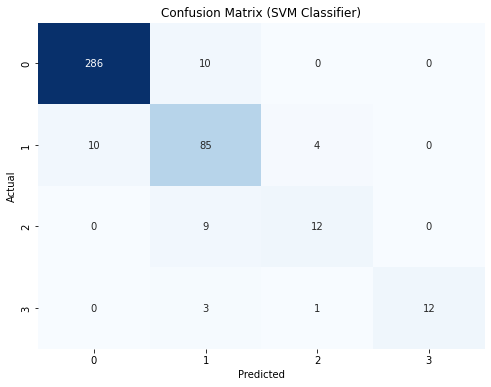

In [43]:
# Confusion Matrix 생성
conf_matrix = confusion_matrix(y_test, pred_svm)

# Confusion Matrix를 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM Classifier)")
plt.show()

# LogisticRegression

In [39]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8379629629629629
[[280  15   1   0]
 [ 31  64   3   1]
 [  0  11   8   2]
 [  0   5   1  10]]


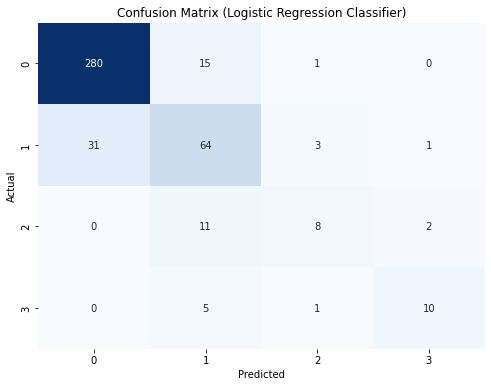

In [44]:
# Confusion Matrix 생성
conf_matrix = confusion_matrix(y_test, pred_lr)

# Confusion Matrix를 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression Classifier)")
plt.show()

# DecisionTree

In [40]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9699074074074074
[[295   1   0   0]
 [  7  88   4   0]
 [  0   0  21   0]
 [  0   1   0  15]]


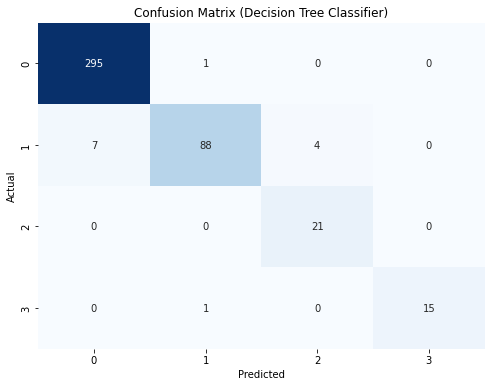

In [45]:
# Confusion Matrix 생성
conf_matrix = confusion_matrix(y_test, pred_dt)

# Confusion Matrix를 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree Classifier)")
plt.show()

# RandomForest

In [50]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred_rf = rf_clf.predict(x_test)
print(accuracy_score(y_test, pred_rf))
print (confusion_matrix(y_test, pred_rf))


--- Random Forest ---
0.9814814814814815
[[295   1   0   0]
 [  0  96   2   1]
 [  0   0  20   1]
 [  0   3   0  13]]


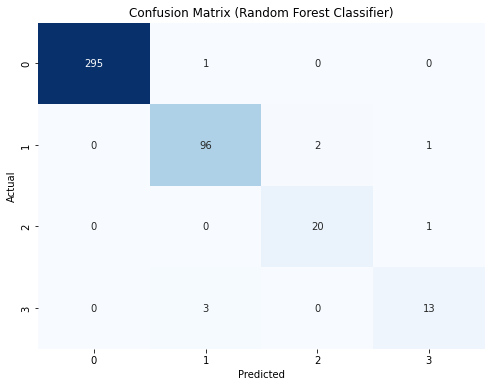

In [51]:
# Confusion Matrix 생성
conf_matrix = confusion_matrix(y_test, pred_rf)

# Confusion Matrix를 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()